# Mg and Ca values for GEOCLIM

This notebook calculates the Mg and Ca composition of lithological classes in order to develop informed constants for the Ca and Mg constant that is used within the GEOCLIM model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import EarthChem data

We can used the igneous whole-rock dataset (largely derived from EarthChem) published as a supplement to Keller et al. 2018.

In [2]:
igneous_geochem = pd.read_csv('../Input/chemistry/Keller2018.csv',delimiter='\t')
igneous_geochem.columns

/Users/yuempark/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ID', 'SAMPLE ID', 'SOURCE', 'REFERENCE', 'LOCALITY', 'METHODS',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'ID.1', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'MAX AGE', 'AGE', 'SIO2', 'TIO2',
       'AL2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'MGO', 'CAO', 'NA2O', 'K2O',
       'P2O5', 'MNO', 'H2O_TOTAL', 'LA', 'CE', 'PR', 'ND', 'SM', 'EU', 'GD',
       'TB', 'DY', 'HO', 'ER', 'TM', 'YB', 'LU', 'LI', 'BE', 'B', 'C', 'CO2',
       'F', 'CL', 'SC', 'TI', 'V', 'CR', 'CO', 'NI', 'CU', 'ZN', 'GA', 'ZR',
       'OS', 'RB', 'BI', 'HG', 'BA', 'Y', 'PB', 'TE', 'NB', 'SR87_SR86', 'TL',
       'PT', 'SN', 'CD', 'AS', 'PD', 'SR', 'SE', 'S', 'AU', 'TA', 'MO', 'U',
       'CS', 'SB', 'AG', 'W', 'TH', 'RE', 'HF', 'IR'],
      dtype='object')

Siliciclastic data from EarthChem:

In [3]:
siliciclastic_geochem = pd.read_csv('../Input/chemistry/EarthChem_siliciclastics.csv')
siliciclastic_geochem.columns

Index(['SAMPLE ID', 'IGSN', 'SOURCE', 'DOI', 'TITLE', 'JOURNAL', 'AUTHOR',
       'CRUISEID', 'LATITUDE', 'LONGITUDE', 'LOC PREC', 'MIN AGE', 'AGE',
       'MAX AGE', 'METHOD', 'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME',
       'SIO2', 'SIO2 Units', 'TIO2', 'TIO2 Units', 'AL2O3', 'AL2O3 Units',
       'FE2O3', 'FE2O3 Units', 'FE2O3T', 'FE2O3T Units', 'FEO', 'FEO Units',
       'FEOT', 'FEOT Units', 'MGO', 'MGO Units', 'CAO', 'CAO Units', 'NA2O',
       'NA2O Units', 'K2O', 'K2O Units', 'P2O5', 'P2O5 Units', 'MNO',
       'MNO Units', 'CR2O3', 'CR2O3 Units', 'CACO3', 'CACO3 Units', 'HE3_HE4',
       'HE3_HE4 Units'],
      dtype='object')

Gneiss data from EarthChem:

In [4]:
gneiss_geochem = pd.read_excel('../Input/chemistry/EarthChem_gneiss.xlsx', header=6)
gneiss_geochem.columns

Index(['SAMPLE ID', 'IGSN', 'SOURCE', 'DOI', 'TITLE', 'JOURNAL', 'AUTHOR',
       'CRUISEID', 'LATITUDE', 'LONGITUDE', 'LOC PREC', 'MIN AGE', 'AGE',
       'MAX AGE', 'METHOD', 'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME',
       'SIO2', 'TIO2', 'AL2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'MGO', 'CAO',
       'NA2O', 'K2O', 'P2O5', 'MNO', 'CR2O3', 'NIO', 'LI', 'BE', 'B', 'C', 'K',
       'CA', 'MG', 'SC', 'TI', 'V', 'FE', 'CR', 'MN', 'CO', 'NI', 'ZN', 'CU',
       'ZR', 'GA', 'GER', 'BA', 'W', 'AU', 'HG', 'TA', 'SB', 'SE', 'SN', 'S',
       'U', 'RE', 'I', 'P', 'Y', 'MO', 'PD', 'TE', 'PT', 'HF', 'IR', 'PB',
       'INDIUM', 'AG', 'TH', 'TL', 'AS', 'RB', 'AL', 'CS', 'SR', 'BI', 'NB',
       'OS', 'CD', 'quartz'],
      dtype='object')

## Median/Mean Values

We can filter the igneous database according to the `COMPOSITION` and `TYPE` field:

In [5]:
print(igneous_geochem['COMPOSITION'].unique())
print(igneous_geochem['TYPE'].unique())

['MAFIC' 'INTERMEDIATE' 'FELSIC' nan 'ULTRAMAFIC' 'EXOTIC' 'UNCERTAIN']
['VOLCANIC' nan 'PLUTONIC']


We can filter the siliciclastic database according to the `ROCK NAME` field:

In [6]:
print(siliciclastic_geochem['ROCK NAME'].unique())

['CLAYSTONE' 'GREYWACKE' 'SANDSTONE' 'CLAY' 'MUDSTONE' 'TURBIDITE'
 'PELITE' 'SILTSTONE' 'SAND' 'WACKE' 'MUD' 'SILT' 'FLYSCH' 'NOT-GIVEN'
 'GRAVEL AND SAND' 'OIL SHALE' 'GRAYWACKE' 'BLACK-SHALE' 'QUARTZ ARENITE'
 'LUTITE' 'TONSTEIN' 'SILICICLASTIC' 'GRAVEL']


There is a prevelance of oil shale data in the EARTHREF sed data. To not bias to these data too heavily we drop them.

In [7]:
ultramafic = igneous_geochem[igneous_geochem.COMPOSITION == 'ULTRAMAFIC']

mafic = igneous_geochem[igneous_geochem.COMPOSITION == 'MAFIC']
mafic_volc = mafic[mafic.TYPE == 'VOLCANIC']
mafic_plutonic = mafic[mafic.TYPE == 'PLUTONIC']

intermediate = igneous_geochem[igneous_geochem.COMPOSITION == 'INTERMEDIATE']
intermediate_volc = intermediate[intermediate.TYPE == 'VOLCANIC']
intermediate_plutonic = intermediate[intermediate.TYPE == 'PLUTONIC']

felsic = igneous_geochem[igneous_geochem.COMPOSITION == 'FELSIC']
felsic_volc = felsic[felsic.TYPE == 'VOLCANIC']
felsic_plutonic = felsic[felsic.TYPE == 'PLUTONIC']

siliciclastic = siliciclastic_geochem[siliciclastic_geochem['ROCK NAME']!='OIL SHALE']

gneiss = gneiss_geochem

Values for bulk upper continental crust:

* 2.48 $\pm$ 0.35 wt% of MgO and 3.59 $\pm$ 0.20 wt% of CaO is for the bulk upper continental crust from Rudnick and Gao (2003) - errors shown are 1 sigma

In [8]:
UCC_MgO = 2.48
UCC_CaO = 3.59

Show values:

In [9]:
lith_class = ['ultramafic',
              'mafic',
              'mafic volcanic',
              'mafic plutonic',
              'intermediate',
              'intermediate volcanic',
              'intermediate plutonic',
              'felsic',
              'felsic volcanic',
              'felsic plutonic',
              'siliciclastic',
              'bulk continental crust',
              'gneiss']
n = np.array([len(ultramafic),
              len(mafic),
              len(mafic_volc),
              len(mafic_plutonic),
              len(intermediate),
              len(intermediate_volc),
              len(intermediate_plutonic),
              len(felsic),
              len(felsic_volc),
              len(felsic_plutonic),
              len(siliciclastic),
              np.nan,
              len(gneiss)])
MgO_median = np.array([ultramafic['MGO'].median(),
                       mafic['MGO'].median(),
                       mafic_volc['MGO'].median(),
                       mafic_plutonic['MGO'].median(),
                       intermediate['MGO'].median(),
                       intermediate_volc['MGO'].median(),
                       intermediate_plutonic['MGO'].median(),
                       felsic['MGO'].median(),
                       felsic_volc['MGO'].median(),
                       felsic_plutonic['MGO'].median(),
                       siliciclastic['MGO'].median(),
                       np.nan,
                       gneiss['MGO'].median()])
MgO_mean = np.array([ultramafic['MGO'].mean(),
                     mafic['MGO'].mean(),
                     mafic_volc['MGO'].mean(),
                     mafic_plutonic['MGO'].mean(),
                     intermediate['MGO'].mean(),
                     intermediate_volc['MGO'].mean(),
                     intermediate_plutonic['MGO'].mean(),
                     felsic['MGO'].mean(),
                     felsic_volc['MGO'].mean(),
                     felsic_plutonic['MGO'].mean(),
                     siliciclastic['MGO'].mean(),
                     UCC_MgO,
                     gneiss['MGO'].mean()])
MgO_std = np.array([ultramafic['MGO'].std(),
                    mafic['MGO'].std(),
                    mafic_volc['MGO'].std(),
                    mafic_plutonic['MGO'].std(),
                    intermediate['MGO'].std(),
                    intermediate_volc['MGO'].std(),
                    intermediate_plutonic['MGO'].std(),
                    felsic['MGO'].std(),
                    felsic_volc['MGO'].std(),
                    felsic_plutonic['MGO'].std(),
                    siliciclastic['MGO'].std(),
                    np.nan,
                    gneiss['MGO'].std()])
CaO_median = np.array([ultramafic['CAO'].median(),
                       mafic['CAO'].median(),
                       mafic_volc['CAO'].median(),
                       mafic_plutonic['CAO'].median(),
                       intermediate['CAO'].median(),
                       intermediate_volc['CAO'].median(),
                       intermediate_plutonic['CAO'].median(),
                       felsic['CAO'].median(),
                       felsic_volc['CAO'].median(),
                       felsic_plutonic['CAO'].median(),
                       siliciclastic['CAO'].median(),
                       np.nan,
                       gneiss['CAO'].median()])
CaO_mean = np.array([ultramafic['CAO'].mean(),
                     mafic['CAO'].mean(),
                     mafic_volc['CAO'].mean(),
                     mafic_plutonic['CAO'].mean(),
                     intermediate['CAO'].mean(),
                     intermediate_volc['CAO'].mean(),
                     intermediate_plutonic['CAO'].mean(),
                     felsic['CAO'].mean(),
                     felsic_volc['CAO'].mean(),
                     felsic_plutonic['CAO'].mean(),
                     siliciclastic['CAO'].mean(),
                     UCC_CaO,
                     gneiss['CAO'].mean()])
CaO_std = np.array([ultramafic['CAO'].std(),
                    mafic['CAO'].std(),
                    mafic_volc['CAO'].std(),
                    mafic_plutonic['CAO'].std(),
                    intermediate['CAO'].std(),
                    intermediate_volc['CAO'].std(),
                    intermediate_plutonic['CAO'].std(),
                    felsic['CAO'].std(),
                    felsic_volc['CAO'].std(),
                    felsic_plutonic['CAO'].std(),
                    siliciclastic['CAO'].std(),
                    np.nan,
                    gneiss['CAO'].std()])
Na2O_median = np.array([ultramafic['NA2O'].median(),
                        mafic['NA2O'].median(),
                        mafic_volc['NA2O'].median(),
                        mafic_plutonic['NA2O'].median(),
                        intermediate['NA2O'].median(),
                        intermediate_volc['NA2O'].median(),
                        intermediate_plutonic['NA2O'].median(),
                        felsic['NA2O'].median(),
                        felsic_volc['NA2O'].median(),
                        felsic_plutonic['NA2O'].median(),
                        siliciclastic['NA2O'].median(),
                        np.nan,
                        gneiss['NA2O'].median()])
Na2O_mean = np.array([ultramafic['NA2O'].mean(),
                      mafic['NA2O'].mean(),
                      mafic_volc['NA2O'].mean(),
                      mafic_plutonic['NA2O'].mean(),
                      intermediate['NA2O'].mean(),
                      intermediate_volc['NA2O'].mean(),
                      intermediate_plutonic['NA2O'].mean(),
                      felsic['NA2O'].mean(),
                      felsic_volc['NA2O'].mean(),
                      felsic_plutonic['NA2O'].mean(),
                      siliciclastic['NA2O'].mean(),
                      np.nan,
                      gneiss['NA2O'].mean()])
Na2O_std = np.array([ultramafic['NA2O'].std(),
                     mafic['NA2O'].std(),
                     mafic_volc['NA2O'].std(),
                     mafic_plutonic['NA2O'].std(),
                     intermediate['NA2O'].std(),
                     intermediate_volc['NA2O'].std(),
                     intermediate_plutonic['NA2O'].std(),
                     felsic['NA2O'].std(),
                     felsic_volc['NA2O'].std(),
                     felsic_plutonic['NA2O'].std(),
                     siliciclastic['NA2O'].std(),
                     np.nan,
                     gneiss['NA2O'].std()])
K2O_median = np.array([ultramafic['K2O'].median(),
                       mafic['K2O'].median(),
                       mafic_volc['K2O'].median(),
                       mafic_plutonic['K2O'].median(),
                       intermediate['K2O'].median(),
                       intermediate_volc['K2O'].median(),
                       intermediate_plutonic['K2O'].median(),
                       felsic['K2O'].median(),
                       felsic_volc['K2O'].median(),
                       felsic_plutonic['K2O'].median(),
                       siliciclastic['K2O'].median(),
                       np.nan,
                       gneiss['K2O'].median()])
K2O_mean = np.array([ultramafic['K2O'].mean(),
                     mafic['K2O'].mean(),
                     mafic_volc['K2O'].mean(),
                     mafic_plutonic['K2O'].mean(),
                     intermediate['K2O'].mean(),
                     intermediate_volc['K2O'].mean(),
                     intermediate_plutonic['K2O'].mean(),
                     felsic['K2O'].mean(),
                     felsic_volc['K2O'].mean(),
                     felsic_plutonic['K2O'].mean(),
                     siliciclastic['K2O'].mean(),
                     np.nan,
                     gneiss['K2O'].mean()])
K2O_std = np.array([ultramafic['K2O'].std(),
                    mafic['K2O'].std(),
                    mafic_volc['K2O'].std(),
                    mafic_plutonic['K2O'].std(),
                    intermediate['K2O'].std(),
                    intermediate_volc['K2O'].std(),
                    intermediate_plutonic['K2O'].std(),
                    felsic['K2O'].std(),
                    felsic_volc['K2O'].std(),
                    felsic_plutonic['K2O'].std(),
                    siliciclastic['K2O'].std(),
                    np.nan,
                    gneiss['K2O'].std()])

geochem_stats = pd.DataFrame({'class':lith_class,
                              'n':n,
                              'MgO median':MgO_median,
                              'MgO mean':MgO_mean,
                              'MgO std':MgO_std,
                              'CaO median':CaO_median,
                              'CaO mean':CaO_mean,
                              'CaO std':CaO_std,
                              'Na2O median':Na2O_median,
                              'Na2O mean':Na2O_mean,
                              'Na2O std':Na2O_std,
                              'K2O median':K2O_median,
                              'K2O mean':K2O_mean,
                              'K2O std':K2O_std})

geochem_stats

,class,n,MgO median,MgO mean,MgO std,CaO median,CaO mean,CaO std,Na2O median,Na2O mean,Na2O std,K2O median,K2O mean,K2O std
0,ultramafic,333.0,19.00,19.301826,9.840718,8.20,9.023039,5.525773,0.685,1.053604,1.148592,0.165,0.605434,1.120846
1,mafic,22895.0,6.80,7.215978,3.331445,9.41,9.244989,2.431025,2.800,2.812069,1.025042,0.760,1.056511,1.135947
2,mafic volcanic,18494.0,6.80,7.145560,3.039766,9.37,9.218380,2.275091,2.880,2.884303,0.991133,0.820,1.073069,1.071001
3,mafic plutonic,3468.0,6.90,7.260145,3.643621,9.95,9.632568,2.846047,2.420,2.523012,1.052828,0.540,0.906130,1.174766
4,intermediate,16762.0,2.66,3.061509,2.418824,5.30,5.270664,2.740324,3.740,3.852657,1.260883,2.340,2.776342,1.940281
5,intermediate volcanic,8156.0,3.28,3.582284,2.683862,5.90,5.648358,2.773948,3.820,3.964371,1.429803,2.170,2.745247,2.034919
6,intermediate plutonic,7977.0,2.20,2.598668,2.027331,4.76,4.973807,2.657960,3.700,3.768229,1.054009,2.410,2.785637,1.852583
7,felsic,16258.0,0.58,0.989776,1.244701,1.44,2.033561,1.984294,3.500,3.450636,1.222203,4.240,3.967792,1.740724
8,felsic volcanic,5460.0,0.65,0.981747,1.088957,1.35,1.898828,1.796204,3.710,3.523135,1.382263,3.920,3.749617,1.819281
9,felsic plutonic,10771.0,0.56,0.993238,1.317149,1.50,2.100825,2.067296,3.420,3.413095,1.128819,4.350,4.079359,1.689215


For the purposes of comparision and sanity-check for the siliciclastic, Table 5.1 of Taylor and MacLennan (1985) shows all post-Archean sedimentary rocks to have MgO of 2.3±0.3 and CaO of 2.0±0.5. The median values for siliciclastic are within the bounds of these reported values and are what we will use. We will use the mean for the others.

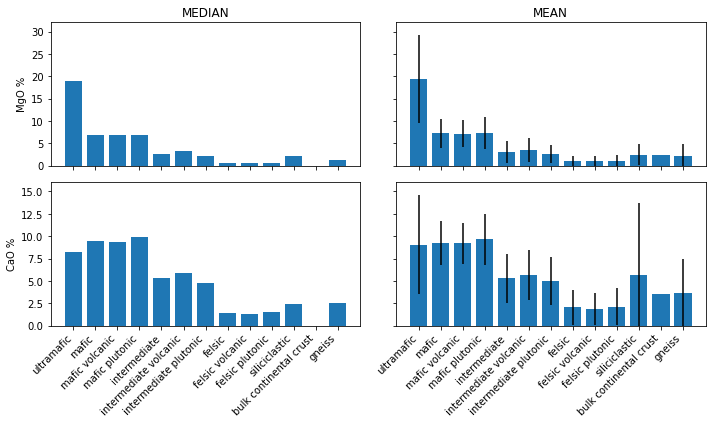

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6), sharex=True, sharey='row')

ax = ax.flatten()

x_pos = np.arange(len(geochem_stats.index))

ax[0].bar(x_pos, geochem_stats['MgO median'])
ax[0].set_ylim(0, np.max(geochem_stats['MgO median'])*1.1)

ax[1].bar(x_pos, geochem_stats['MgO mean'], yerr=geochem_stats['MgO std'])
ax[1].set_ylim(0, np.max(geochem_stats['MgO mean']+geochem_stats['MgO std'])*1.1)

ax[2].bar(x_pos, geochem_stats['CaO median'])
ax[2].set_ylim(0, np.max(geochem_stats['CaO median'])*1.1)

ax[3].bar(x_pos, geochem_stats['CaO mean'], yerr=geochem_stats['CaO std'])
ax[3].set_ylim(0, np.max(geochem_stats['CaO mean']+geochem_stats['CaO std'])*1.1)

ax[0].set_ylabel('MgO %')
ax[2].set_ylabel('CaO %')

ax[2].set_xticks(x_pos)
ax[2].set_xticklabels(geochem_stats['class'], rotation=45, horizontalalignment='right')

ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(geochem_stats['class'], rotation=45, horizontalalignment='right')

ax[0].set_title('MEDIAN')
ax[1].set_title('MEAN')

fig.tight_layout()
plt.show(fig)

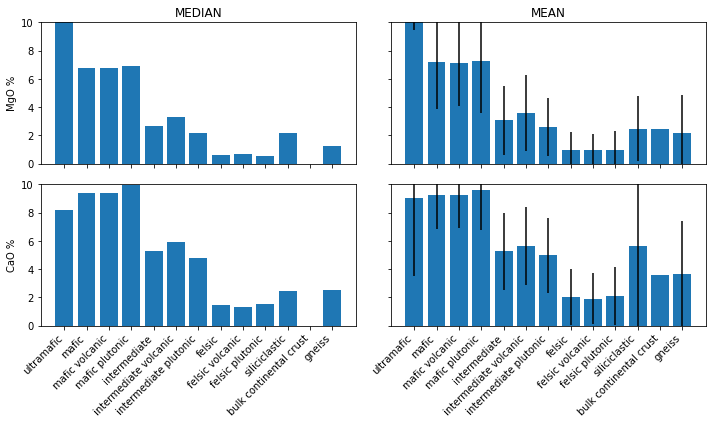

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6), sharex=True, sharey='row')

ax = ax.flatten()

x_pos = np.arange(len(geochem_stats.index))

ax[0].bar(x_pos, geochem_stats['MgO median'])
ax[0].set_ylim(0, 10)

ax[1].bar(x_pos, geochem_stats['MgO mean'], yerr=geochem_stats['MgO std'])
ax[1].set_ylim(0, 10)

ax[2].bar(x_pos, geochem_stats['CaO median'])
ax[2].set_ylim(0, 10)

ax[3].bar(x_pos, geochem_stats['CaO mean'], yerr=geochem_stats['CaO std'])
ax[3].set_ylim(0, 10)

ax[0].set_ylabel('MgO %')
ax[2].set_ylabel('CaO %')

ax[2].set_xticks(x_pos)
ax[2].set_xticklabels(geochem_stats['class'], rotation=45, horizontalalignment='right')

ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(geochem_stats['class'], rotation=45, horizontalalignment='right')

ax[0].set_title('MEDIAN')
ax[1].set_title('MEAN')

fig.tight_layout()
plt.show(fig)

## Calculate mol/m$^3$ for each composition

In [12]:
# formula weight of elements (g/mol)
FW_O = 15.999
FW_Mg = 24.305
FW_Ca = 40.078
FW_Na = 22.990
FW_K = 39.098

# weight fraction in mafic (kg/kg)
m_MgO_mafic = np.float(geochem_stats[geochem_stats['class']=='mafic']['MgO mean'])/100
m_CaO_mafic = np.float(geochem_stats[geochem_stats['class']=='mafic']['CaO mean'])/100
m_Na2O_mafic = np.float(geochem_stats[geochem_stats['class']=='mafic']['Na2O mean'])/100
m_K2O_mafic = np.float(geochem_stats[geochem_stats['class']=='mafic']['K2O mean'])/100

# weight fraction in intermediate (kg/kg)
m_MgO_intermediate = np.float(geochem_stats[geochem_stats['class']=='intermediate']['MgO mean'])/100
m_CaO_intermediate = np.float(geochem_stats[geochem_stats['class']=='intermediate']['CaO mean'])/100
m_Na2O_intermediate = np.float(geochem_stats[geochem_stats['class']=='intermediate']['Na2O mean'])/100
m_K2O_intermediate = np.float(geochem_stats[geochem_stats['class']=='intermediate']['K2O mean'])/100

# weight fraction in felsic (kg/kg)
m_MgO_felsic = np.float(geochem_stats[geochem_stats['class']=='felsic']['MgO mean'])/100
m_CaO_felsic = np.float(geochem_stats[geochem_stats['class']=='felsic']['CaO mean'])/100
m_Na2O_felsic = np.float(geochem_stats[geochem_stats['class']=='felsic']['Na2O mean'])/100
m_K2O_felsic = np.float(geochem_stats[geochem_stats['class']=='felsic']['K2O mean'])/100

# weight fraction in siliciclastic (kg/kg)
m_MgO_siliciclastic = np.float(geochem_stats[geochem_stats['class']=='siliciclastic']['MgO median'])/100
m_CaO_siliciclastic = np.float(geochem_stats[geochem_stats['class']=='siliciclastic']['CaO median'])/100
m_Na2O_siliciclastic = np.float(geochem_stats[geochem_stats['class']=='siliciclastic']['Na2O mean'])/100
m_K2O_siliciclastic = np.float(geochem_stats[geochem_stats['class']=='siliciclastic']['K2O mean'])/100

# weight fraction in upper continental crust (kg/kg)
m_MgO_UCC = np.float(geochem_stats[geochem_stats['class']=='bulk continental crust']['MgO mean'])/100
m_CaO_UCC = np.float(geochem_stats[geochem_stats['class']=='bulk continental crust']['CaO mean'])/100

# densities (kg/m3)
rho_bas = 3000
rho_andesite = 2800
rho_rhyolite = 2500
rho_siliciclastic = 2300
rho_UCC = 2700

# convert formula weight to mol/kg
unit_FW_Mg = 1/(FW_Mg/1000)
unit_FW_Ca = 1/(FW_Ca/1000)
unit_FW_Na = 1/(FW_Na/1000)
unit_FW_K = 1/(FW_K/1000)

In [13]:
# weight fraction of Mg (kg/kg)
m_Mg_mafic = (FW_Mg / (FW_Mg + FW_O)) * m_MgO_mafic
m_Mg_intermediate = (FW_Mg / (FW_Mg + FW_O)) * m_MgO_intermediate
m_Mg_felsic = (FW_Mg / (FW_Mg + FW_O)) * m_MgO_felsic
m_Mg_siliciclastic = (FW_Mg / (FW_Mg + FW_O)) * m_MgO_siliciclastic
m_Mg_UCC = (FW_Mg / (FW_Mg + FW_O)) * m_MgO_UCC

In [14]:
# weight fraction of Ca (kg/kg)
m_Ca_mafic = (FW_Ca / (FW_Ca + FW_O)) * m_CaO_mafic
m_Ca_intermediate = (FW_Ca / (FW_Ca + FW_O)) * m_CaO_intermediate
m_Ca_felsic = (FW_Ca / (FW_Ca + FW_O)) * m_CaO_felsic
m_Ca_siliciclastic = (FW_Ca / (FW_Ca + FW_O)) * m_CaO_siliciclastic
m_Ca_UCC = (FW_Ca / (FW_Ca + FW_O)) * m_CaO_UCC

In [15]:
# weight fraction of Na (kg/kg)
m_Na_mafic = ((FW_Na*2) / ((FW_Na*2) + FW_O)) * m_Na2O_mafic
m_Na_intermediate = ((FW_Na*2) / ((FW_Na*2) + FW_O)) * m_Na2O_intermediate
m_Na_felsic = ((FW_Na*2) / ((FW_Na*2) + FW_O)) * m_Na2O_felsic
m_Na_siliciclastic = ((FW_Na*2) / ((FW_Na*2) + FW_O)) * m_Na2O_siliciclastic

In [16]:
# weight fraction of K (kg/kg)
m_K_mafic = ((FW_K*2) / ((FW_K*2) + FW_O)) * m_K2O_mafic
m_K_intermediate = ((FW_K*2) / ((FW_K*2) + FW_O)) * m_K2O_intermediate
m_K_felsic = ((FW_K*2) / ((FW_K*2) + FW_O)) * m_K2O_felsic
m_K_siliciclastic = ((FW_K*2) / ((FW_K*2) + FW_O)) * m_K2O_siliciclastic

In [17]:
CaMg_mafic = (m_Mg_mafic * unit_FW_Mg * rho_bas)+(m_Ca_mafic * unit_FW_Ca * rho_bas)
CaMg_int = (m_Mg_intermediate * unit_FW_Mg * rho_andesite)+(m_Ca_intermediate * unit_FW_Ca * rho_andesite)
CaMg_felsic = (m_Mg_felsic * unit_FW_Mg * rho_rhyolite)+(m_Ca_felsic * unit_FW_Ca * rho_rhyolite)
CaMg_siliciclastic = (m_Mg_siliciclastic * unit_FW_Mg * rho_siliciclastic)+(m_Ca_siliciclastic * unit_FW_Ca * rho_siliciclastic)
CaMg_UCC = (m_Mg_UCC * unit_FW_Mg * rho_UCC)+(m_Ca_UCC * unit_FW_Ca * rho_UCC)

print('Ca + Mg in mol/m3:')
print('------------------')
print('mafic                  = {:.1f}'.format(CaMg_mafic))
print('intermediate           = {:.1f}'.format(CaMg_int))
print('felsic                 = {:.1f}'.format(CaMg_felsic))
print('siliciclastic          = {:.1f}'.format(CaMg_siliciclastic))
print('bulk continental crust = {:.1f}'.format(CaMg_UCC))

Ca + Mg in mol/m3:
------------------
mafic                  = 10317.0
intermediate           = 4758.6
felsic                 = 1520.5
siliciclastic          = 2235.0
bulk continental crust = 3389.9


In [18]:
NaK_mafic = (m_Na_mafic * unit_FW_Na * rho_bas)+(m_K_mafic * unit_FW_K * rho_bas)
NaK_int = (m_Na_intermediate * unit_FW_Na * rho_andesite)+(m_K_intermediate * unit_FW_K * rho_andesite)
NaK_felsic = (m_Na_felsic * unit_FW_Na * rho_rhyolite)+(m_K_felsic * unit_FW_K * rho_rhyolite)
NaK_siliciclastic = (m_Na_siliciclastic * unit_FW_Na * rho_siliciclastic)+(m_K_siliciclastic * unit_FW_K * rho_siliciclastic)

print('Na + K in mol/m3:')
print('------------------')
print('mafic                  = {:.1f}'.format(NaK_mafic))
print('intermediate           = {:.1f}'.format(NaK_int))
print('felsic                 = {:.1f}'.format(NaK_felsic))
print('siliciclastic          = {:.1f}'.format(NaK_siliciclastic))

Na + K in mol/m3:
------------------
mafic                  = 3395.3
intermediate           = 5131.6
felsic                 = 4889.9
siliciclastic          = 2368.2


In [19]:
CaMgNaK_mafic = CaMg_mafic + NaK_mafic
CaMgNaK_int = CaMg_int + NaK_int
CaMgNaK_felsic = CaMg_felsic + NaK_felsic
CaMgNaK_siliciclastic = CaMg_siliciclastic + NaK_siliciclastic

print('Ca + Mg + Na + K in mol/m3:')
print('------------------')
print('mafic                  = {:.1f}'.format(CaMgNaK_mafic))
print('intermediate           = {:.1f}'.format(CaMgNaK_int))
print('felsic                 = {:.1f}'.format(CaMgNaK_felsic))
print('siliciclastic          = {:.1f}'.format(CaMgNaK_siliciclastic))

Ca + Mg + Na + K in mol/m3:
------------------
mafic                  = 13712.3
intermediate           = 9890.2
felsic                 = 6410.4
siliciclastic          = 4603.2


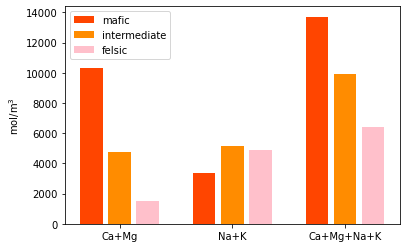

In [20]:
fig, ax = plt.subplots()

width = 0.2
gap = 0.05
x_pos_2 = np.arange(3)
x_pos_1 = x_pos_2 - width - gap
x_pos_3 = x_pos_2 + width + gap

ax.bar(x_pos_1, [CaMg_mafic, NaK_mafic, CaMgNaK_mafic],
       width, facecolor='orangered', label='mafic')
ax.bar(x_pos_2, [CaMg_int, NaK_int, CaMgNaK_int],
       width, facecolor='darkorange', label='intermediate')
ax.bar(x_pos_3, [CaMg_felsic, NaK_felsic, CaMgNaK_felsic],
       width, facecolor='pink', label='felsic')

ax.set_xticks(x_pos_2)
ax.set_xticklabels(['Ca+Mg', 'Na+K', 'Ca+Mg+Na+K'])
ax.set_ylabel('mol/m$^{3}$')
ax.legend()

#plt.savefig('../../Manuscript/Figures/lithology_composition.pdf', bbox_inches='tight')
plt.show()

## Applying these values to the Global Lithological Map

We develop 7 categories using the Hartmann and Moosdorf (2012) global lithological map database GLiM and assign the GLiM units to these categories:

|ID |type |GLiM unit types in category| assigned Ca + Mg (mol/m3)|
|---|-----|---------------------------|--------------------------|
|0  | ocean/ice/lakes | ig, wb | - |
|1  | bulk continental crust | mt, nd | 3390 |
|2  | felsic | pa, py, va | 1521 |
|3  | intermediate | pi, vi | 4759 |
|4  | mafic | pb, vb | 10317 |
|5  | carbonate | ev, sc | - |
|6  | siliciclastic | sm, ss, su | 2235 |

## Compare to original GEOCLIM DYNSOIL value

The value for CaMg_UCC in the DYNSOIL code was developed using the framework described in the cell below and calibrated to match a total cation flux of 6.8 Tmol/yr. It might be better to match to a total Ca/Mg cation flux. In Gaillardet et al. (1999), the total Ca/Mg cation flux is given as 2500 10^9 mol/yr, but it looks like this number doesn't include the volcanic island/arc flux which is estimated to be 40% of the Mg-Ca silicate weathering. Perhaps that means that the total Ca/Mg cation flux should be 3500 10^9 mol/yr (i.e 3.5 Tmol/yr)? 

In [21]:
2500+(2500*.4)

3500.0

In [22]:
# the original value for CaMg_UCC in the GEOCLIM DYNSOIL code was 3453 mol/m^3
# this value was calibrated to match 6.8 and calculated using the values below

#tuned so that total weathering is 6.8 cation flux with PAL of 1
tuning_factor = 0.85 

#mol of Ca and Mg cations per kg of cation (Gaillardet et al. 1999)
mol_CaMg_kg = 12.5 

#fraction cation in rock (first parameter in West 2012 table which he gives as 
#best fit of 0.09 and range of 0.04 to 0.13)
#Rudnick and Gao have 0.08 to 0.10 as expected fraction of cations in fresh rock
frac_cation = 0.13 

#density of rock (needed to convert into volume)
density_UCC = 2500

CaMg_UCC = tuning_factor * mol_CaMg_kg * frac_cation * density_UCC
CaMg_UCC

3453.125

If the values are kept the same as above, but the fraction cation in rock is reduced to 0.04 (the minimum range value in the West, 2012 fit) then the CaMg_UCC is quite close to the value calculated above for felsic rocks.

In [23]:
# revised value for UCC

#
tuning_factor = 1 

#mol of Ca and Mg cations per kg of cation (Gaillardet et al. 1999)
mol_CaMg_kg = 12.5 

#fraction cation in rock (first parameter in West 2012 table which he gives as 
#best fit of 0.09 and range of 0.04 to 0.13)
#Rudnick and Gao have 0.08 to 0.10 as expeted fraction of cations in fresh rock
frac_cation = 0.04 

#density of rock (needed to convert into volume)
density_UCC = 2500

CaMg_UCC = tuning_factor * mol_CaMg_kg * frac_cation * density_UCC
CaMg_UCC

1250.0